# GA Based DG to Facility Assignment Optimization Tests

In [1]:
from _products.visualization_tools import *
from _products.utility_fnc import blocking_sound_player as bsp, error_sounds as err_snd, Alert_sounds as alrt_snd
from _LearningMachines._BIO._GA.GA_TOOLS4 import *


# these need to be the paths to the data files for the various agents in the model
DG_FILES = r'C:\Users\gjone\ConvergentSolarTools\DataFiles\dg.csv'
budget = r'C:\Users\gjone\ConvergentSolarTools\DataFiles\budget.csv'
Distances = r'C:\Users\gjone\ConvergentSolarTools\DataFiles\Distance of DG to Building .csv'
facilities = r'C:\Users\gjone\ConvergentSolarTools\DataFiles\nodes.csv'

# store the scores for a given generational biase
hp_dict = {}

In [2]:
DG_df = pd.read_csv(DG_FILES)

display(DG_df.head())

for v in DG_df.columns.tolist():
    print("'{}',".format(v))

,id,output,pos-x,pos-y,rated_power,investment_cost,o&m_cost,excess_penetration_cost_LOW,excess_penetration_cost_MEDIUM,excess_penetration_cost_HIGH
0,1.0,1351248.0,35.953747,-83.943975,5000000.0,1.36,0.041,0.68,1.36,2.04
1,2.0,1351248.0,35.967477,-83.937751,5000000.0,1.36,0.041,0.68,1.36,2.04
2,3.0,1351248.0,36.062503,-83.996649,5000000.0,1.36,0.041,0.68,1.36,2.04
3,4.0,1351248.0,35.975097,-83.936355,5000000.0,1.36,0.041,0.68,1.36,2.04
4,5.0,1351248.0,35.968580,-83.993414,5000000.0,1.36,0.041,0.68,1.36,2.04


'id',
'output',
'pos-x',
'pos-y',
'rated_power',
'investment_cost',
'o&m_cost',
'excess_penetration_cost_LOW',
'excess_penetration_cost_MEDIUM',
'excess_penetration_cost_HIGH',


In [3]:
display(pd.read_csv(facilities))

,id,demand,penalty,pos-x,pos-y
0,1,495434,10,35.953747,-83.943975
1,2,495434,10,35.967477,-83.937751
2,3,495434,10,36.062503,-83.996649
3,4,495434,10,35.975097,-83.936355
4,5,495434,10,35.968580,-83.993414
5,6,18031,5,35.984883,-83.903327
6,7,18031,5,35.986606,-83.932197
7,8,18031,5,35.992759,-83.952804
8,9,18031,5,35.991716,-84.001613
9,10,18031,5,35.935312,-83.869820


In [29]:




# slight mutation bias, small offspring over best-copy bias
# score: 
# pm = .05                 # probability of muation, i.e. have bits flip in the children
# pc=.5                   # probability of the kids being mixtures of the parents(crossover) or being copies

# 
pm = .04                # probability of muation, i.e. have bits flip in the children
pc=.65                   # probability of the kids being mixtures of the parents(crossover) or being copies


pm = .03                 # probability of muation, i.e. have bits flip in the children
pc=.60                   # probability of the kids being mixtures of the parents(crossover) or being copies

population_size=40                 # population size, i.e. the number of solution each generation

generations= 100       # the number of generations of solutions to run, i.e. the number of training epochs10+-*
strlen = None
oneprob=9/25
oneprob=None
num_open=12              # number of generators you wish to shoot for being open, oneprob is given this is ignored
init_func2 = None       # none uses one of the predesigne intializes based on wheither oneprob is None or not
#init_func2 = pure_rng_init          #bad
gaoptmzr = DG_Optimizer(population_size, 
                         pm, pc,
                         DG_FILES, facilities, Distances, generations,strlen=strlen,
                         budgetfile=None, verbose=False, init_func=init_func2,
                         threshold=.00001, Nopen=num_open, oneprob=oneprob, mode="MIN2")

# alert that setting up the optimizer is complete
bsp(alrt_snd[0])


strlen:  25

				siniting.......




------------------The First Epoch's Generation---------------------

 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 


 12
13 

-------The First Epoch's Generation-Max: 12, Min: 12--------------



In [30]:
# DG Solver object
strlen = gaoptmzr.dgSolver.dgset.N
print(strlen)

# GA optimzer object
gens = gaoptmzr.gaoptmzr.generations

print(gens)

25
100


# The Spark.....

In [36]:
probability_gen=gaoptmzr.gaoptmzr.get_prob_tally
# probability_gen=None
pair_selector = gaoptmzr.gaoptmzr.pair_pop
# pair_selector = None


gaoptmzr.optimize(probability_gen=probability_gen, pair_selector=pair_selector,child_gen=None,)


hpKey = "pm: {}-pc: {}-oneprob: {}-Nopen: {}-pop: {}".format(pm, pc, oneprob,num_open, population_size)
if hpKey not in hp_dict:
    hp_dict[hpKey] = dict()
    hp_dict[hpKey]['best_score']=[]
    hp_dict[hpKey]['soln']=[] 

# store the results for this set up
hp_dict[hpKey]['best_score'].append(gaoptmzr.best_scores)
hp_dict[hpKey]['soln'].append(gaoptmzr.best_solution)




# allert that the tesing is complete
bsp(alrt_snd[1])
print("Done")

The game of life begins....

			-----------NEW BEST SCORE!!: 10071789.291000, GEN: 0

Generation: 0
best_score this run: 10071789.291000001
best score so far: 10071789.291000001
best solution so far: [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 1, 0, 1, 0, 0, 0, 0, 1]
pc: 0.6, pm: 0.03, pop: 40

			-----------NEW BEST SCORE!!: 5284725.568000, GEN: 1

Generation: 2
best_score this run: 10071789.291000001
best score so far: 5284725.568
best solution so far: [0.0, 0.0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.0, 0, 0, 1, 0, 0, 0, 0, 1]
pc: 0.6, pm: 0.03, pop: 40


Generation: 4
best_score this run: 11805837.329
best score so far: 5284725.568
best solution so far: [0.0, 0.0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.0, 0, 0, 1, 0, 0, 0, 0, 1]
pc: 0.6, pm: 0.03, pop: 40


Generation: 6
best_score this run: 13542664.756000001
best score so far: 5284725.568
best solution so far: [0.0, 0.0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.0, 0, 0, 1, 0, 0, 0, 0, 1]
pc: 0.6, pm: 0.


Generation: 68
best_score this run: 6186222.606000001
best score so far: 1772075.108
best solution so far: [0.0, 0.0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0]
pc: 0.6, pm: 0.03, pop: 40


Generation: 70
best_score this run: 6186222.606000001
best score so far: 1772075.108
best solution so far: [0.0, 0.0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0]
pc: 0.6, pm: 0.03, pop: 40


Generation: 72
best_score this run: 6186222.606000001
best score so far: 1772075.108
best solution so far: [0.0, 0.0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0]
pc: 0.6, pm: 0.03, pop: 40


Generation: 74
best_score this run: 5751138.198
best score so far: 1772075.108
best solution so far: [0.0, 0.0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0]
pc: 0.6, pm: 0.03, pop: 40


Generation: 76
best_score this run: 6186216.92
best score so far: 1772075.108
best solution so far: [0.0, 0.0, 0, 0, 0, 0, 1, 0, 0, 1

# Lets See how they did......

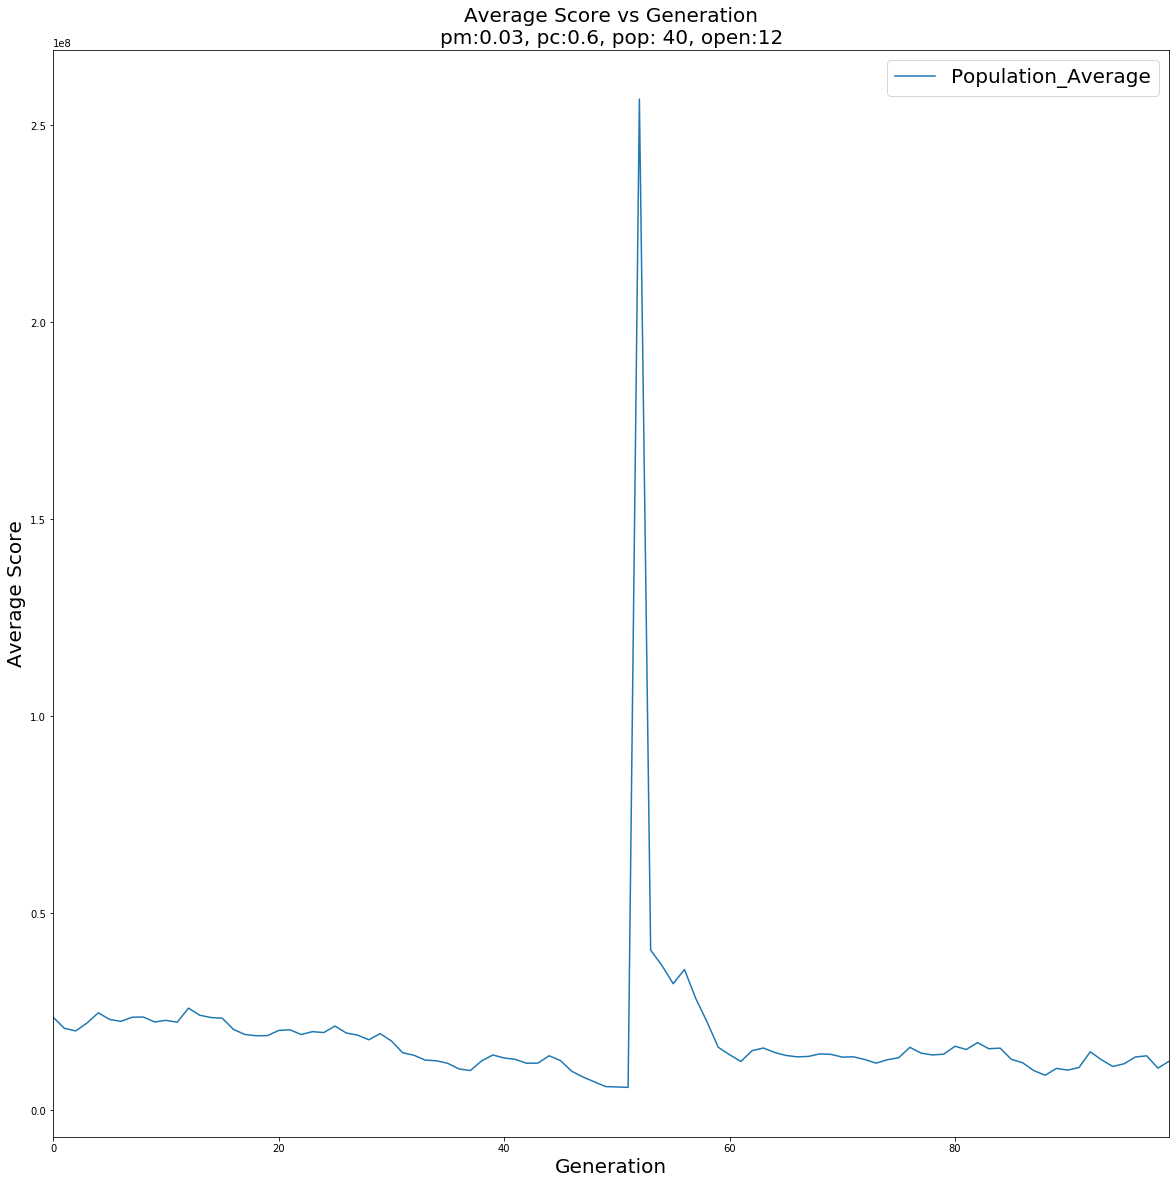

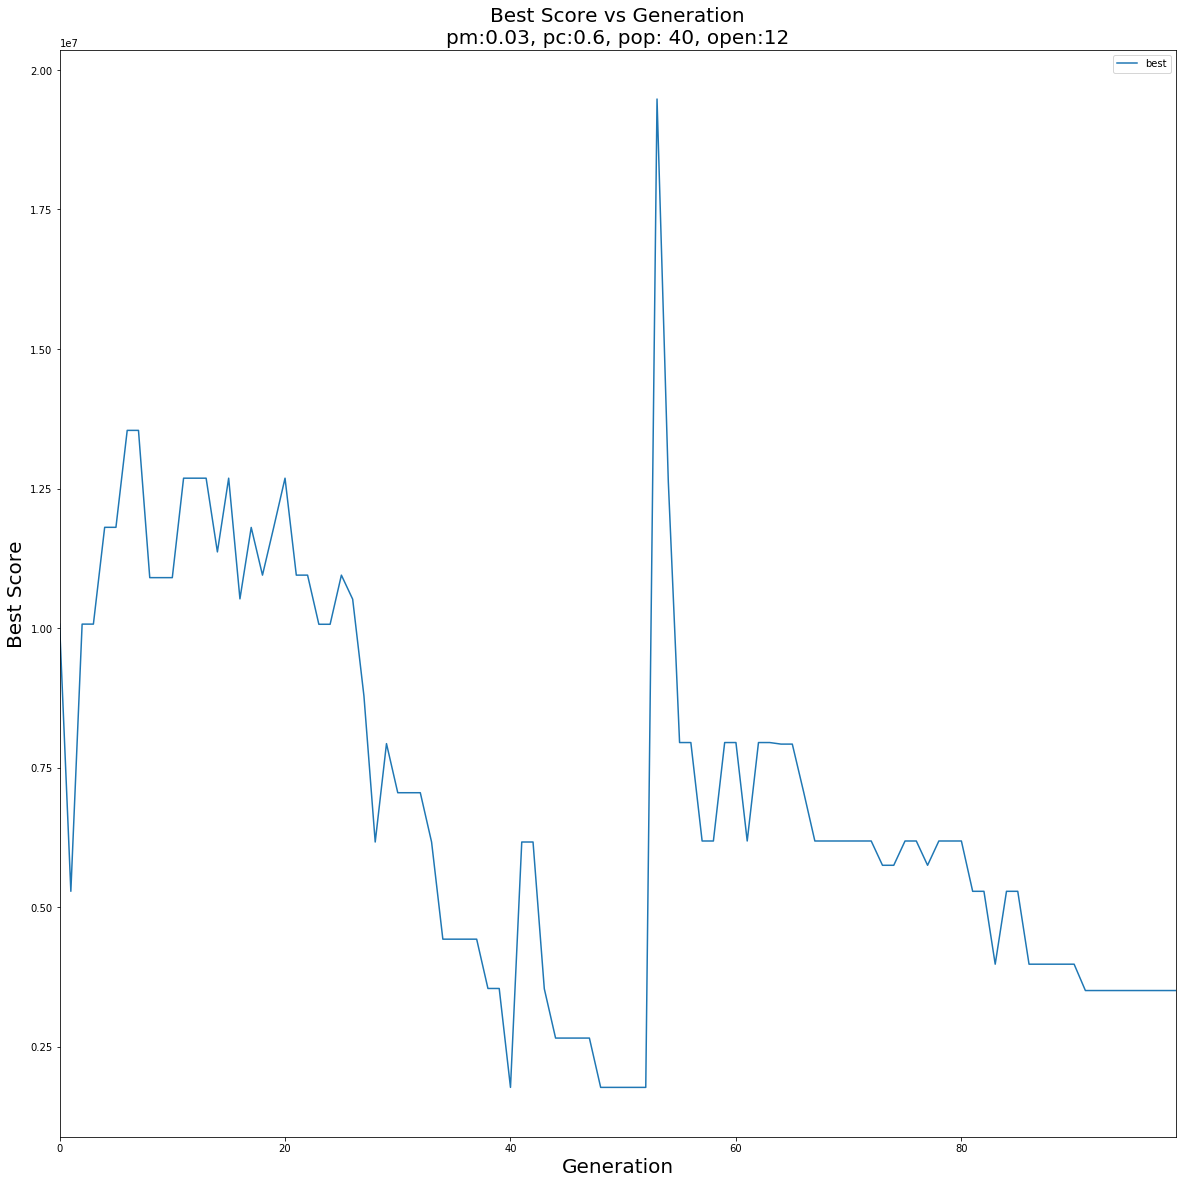


Set up:
pm: 0.07-pc: 0.1-oneprob: None-Nopen: 12-pop: 20
Average Best score: 36632782.46358 from 1 runs
Best Solution :[1, 0.0, 1, 0.0, 1, 1.0, 1, 1, 0.0, 1, 0, 0.0, 0, 1.0, 0.0, 0, 0.0, 0, 1, 0.0, 1, 0.0, 1.0, 0.0, 1]

Set up:
pm: 0.07-pc: 0.6-oneprob: None-Nopen: 12-pop: 20
Average Best score: 24305268.510300003 from 1 runs
Best Solution :[0, 0, 0.0, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]

Set up:
pm: 0.03-pc: 0.6-oneprob: None-Nopen: 12-pop: 20
Average Best score: 26407633.4325 from 1 runs
Best Solution :[0, 0, 0.0, 1, 0.0, 1, 0, 0, 0.0, 0.0, 0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1, 1.0, 0, 0, 0, 0.0]

Set up:
pm: 0.03-pc: 0.6-oneprob: None-Nopen: 12-pop: 40


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [37]:
# visualize their solution learning ability
gaoptmzr.show_results(figsize=(20, 20),
                     fontdict={"size":20}, prop={"size":20},
                    )



# Display results log:
for Key in hp_dict:
    print("\nSet up:\n{}".format(Key))
    print("Average Best score: {} from {} runs".format(np.mean(hp_dict[Key]['best_score']), len(hp_dict[Key]['best_score'])))
    print("Best Solution :{}".format(hp_dict[Key]['soln'][0])) 


In [ ]:
# Testing setting 1 by index
ze = np.zeros(10)
ze[np.random.default_rng().choice([1, 5, 4, 9, 2, 6, 3, 7, 8, 0], 6, replace=False)] = 1
ze

# Solution Testing Cell
> copy the reportes best solution into the list of list solns and run the cell to make sure the 
> reported scores match up to the calculated ones. This basically is a sanity check

In [ ]:
# Test a given solution to make sure things are working as expected
solns = [[0.0, 0.0, 0.0, 0, 0, 0.0, 0, 0.0, 0, 0, 0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0, 0, 0, 0.0, 0.0, 0, 0, 1]]

# reported 33305047.277000, 
# 17294281.508
#  1772081 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

scores = gaoptmzr.gaoptmzr.solver.score_population(solns)
idx=0
for i in solns[0]: 
    if i == 1:
        print("Solution Id {}".format(idx))
    idx += 1
print(gaoptmzr.gaoptmzr.solver.dgset.assignments)
print("Calculated: ",scores)

In [10]:
display(gaoptmzr.gaoptmzr.solver.nodes.nodes)
display(gaoptmzr.gaoptmzr.solver.dgset.dg_df)

,id,demand,penalty,pos-x,pos-y,suppliedPower
0,1,495434,10,35.953747,-83.943975,495434.0
1,2,495434,10,35.967477,-83.937751,729750.0
2,3,495434,10,36.062503,-83.996649,729750.0
3,4,495434,10,35.975097,-83.936355,729750.0
4,5,495434,10,35.968580,-83.993414,729750.0
5,6,18031,5,35.984883,-83.903327,729750.0
6,7,18031,5,35.986606,-83.932197,729750.0
7,8,18031,5,35.992759,-83.952804,729750.0
8,9,18031,5,35.991716,-84.001613,729750.0
9,10,18031,5,35.935312,-83.869820,729750.0


,id,output,pos-x,pos-y,rated_power,investment_cost,o&m_cost,excess_penetration_cost_LOW,excess_penetration_cost_MEDIUM,excess_penetration_cost_HIGH,costs,current_output
0,1.0,1351248.0,35.953747,-83.943975,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,1351248.0
1,2.0,1351248.0,35.967477,-83.937751,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,1351248.0
2,3.0,1351248.0,36.062503,-83.996649,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,1351248.0
3,4.0,1351248.0,35.975097,-83.936355,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,1351248.0
4,5.0,1351248.0,35.968580,-83.993414,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,1351248.0
5,6.0,270250.0,35.984883,-83.903327,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,270250.0
6,7.0,270250.0,35.986606,-83.932197,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,270250.0
7,8.0,270250.0,35.992759,-83.952804,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,270250.0
8,9.0,270250.0,35.991716,-84.001613,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,270250.0
9,10.0,270250.0,35.935312,-83.869820,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,270250.0


In [11]:
test_df = pd.DataFrame({
    "a":np.random.default_rng().choice([1, 5, 4, 9, 2, 6, 3, 7, 8, 0], 6, replace=False),
    "b":np.random.default_rng().choice([1, 5, 4, 9, 2, 6, 3, 7, 8, 0], 6, replace=False),
})


print(test_df)


print(test_df.loc[:, "a"].max())

   a  b
0  4  0
1  2  1
2  6  5
3  5  9
4  1  2
5  9  6
9


# References:

* [Genetic Algorithms: John H. Holland, July 1992, Scientific American](https://www.jstor.org/stable/pdf/24939139.pdf?refreqid=excelsior%3A037d6e486556a59706db6b7fb51c5205)

In [12]:
a = np.mean([1, 2, 3, 4])
print(a) 
b = [1,2,3,4,5]
print(b[:-1])

2.5
[1, 2, 3, 4]


In [13]:
thtng = np.around(44.55757575, 4)
print(thtng)

44.5576


In [14]:
# test_scores = {0: np.random.default_rng().uniform(1, 100, 1)[0], 
#                1: np.random.default_rng().uniform(1, 100, 1)[0], 
#                2:np.random.default_rng().uniform(1, 100, 1)[0], 
#                3:np.random.default_rng().uniform(1, 100, 1)[0], 
#                4:np.random.default_rng().uniform(1, 100, 1)[0],
#                           }
test_scores = dict(sorted(test_scores.items(), key=lambda x: x[1]))
for idx in test_scores:
    print("idx: ", idx, " score: ", test_scores[idx])

# reversethem to get the style we need
lilend = sorted(list(test_scores.values()), reverse=True)

idxes = list(test_scores.keys())

scores = list(test_scores.values())
print("scores: ", scores)
print("Reversed: ", lilend)
print("indices: ", idxes)
# get the probs

# reverse porbs
rev_dict = {}
for k, rscr in zip(test_scores, lilend):
    rev_dict[k] = rscr
for idx in rev_dict:
    print("idx: ", idx, " score: ", rev_dict[idx])

    
    
scores = list(rev_dict.values())
probss = np.array(scores)/np.sum(scores)
# invprobss = np.array(np.sum(scores) - scores)/np.sum(scores)


print("probs: ", probss)

# print(invprobss)

# get the cum sum
cumsumm = np.cumsum(probss)
# cumsumm = probss
print(cumsumm)


rngNum = np.random.default_rng().uniform(0,1, 1)[0]
print(rngNum)


# get a rng index 
nextn = -1
parent = -np.inf
while parent <= rngNum and nextn < len(idxes):
    nextn += 1
    parent = cumsumm[nextn]
    print("rng: {}, parent: {}, next: {}".format(rngNum, parent, nextn))
if idx == len(idxes):
    next -= 1

print(idxes[nextn])

NameError: name 'test_scores' is not defined